In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import defaultdict
import re
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

In [8]:
d_dict = defaultdict(lambda: [])

with open("predictions.txt", "r") as f:
    for line in f.readlines()[1:]:
        m = None
        try:
            m = re.findall(r"\d{3}", line)[-1]
        except IndexError:
            continue
        try:
            vals = list(map(int, line.split()[-2:]))
        except ValueError as e:
            print(e)
            continue
        vals.insert(0, int(m))

        d_dict["/".join(line.strip().split("/")[0:-1])].append(vals)
for key in d_dict:
    d_dict[key].sort()

In [9]:
print(list(d_dict.items())[200])
len(d_dict.items())

('No excision - benign/HRMC_34/3', [[1, 0, 0], [2, 0, 0], [3, 0, 0], [4, 0, 0], [5, 0, 0]])


481

In [10]:
first_image = 0
last_image = 0

first_image_pred = []
last_image_pred = []
first_image_trth = []
last_image_trth = []

candidates = []

total = 0

for key in d_dict:
    lists = d_dict[key]
    
    #Indexes 
    # 1 = Pred #2 = Grth Trth
    
    #if len(lists) <= 2:
        #print("Too few?", key, "len", len(lists))
    
    # If image is not Melanoma we skip it
    #if lists[0][2] != 1:
    #    continue
    
    if lists[0][1] == lists[0][2]:
        first_image += 1
    
    if lists[-1][1] == lists[-1][2]:
        last_image += 1
    
    first_image_pred.append(lists[0][1])
    last_image_pred.append(lists[-1][1])
    first_image_trth.append(lists[0][2])
    last_image_trth.append(lists[-1][2])
    
    if first_image_pred[-1] != last_image_pred[-1]:
        candidates.append(key)
    
    total += 1

In [11]:
print(first_image, last_image, total)
#print(len(d_dict))

410 428 481


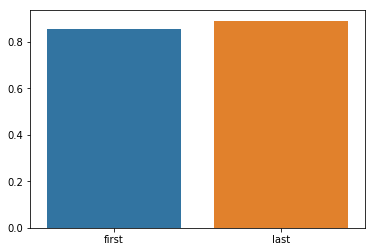

In [5]:
data = [first_image/total, last_image/total]

sns.barplot(x=["first", "last"], y=data)
plt.

In [6]:
plt.tight_layout(h_pad=2)

<Figure size 432x288 with 0 Axes>

In [7]:
plt.show()

In [8]:
print('First frame acc overall', metrics.accuracy_score(first_image_trth, first_image_pred))
print('Last frame acc overall', metrics.accuracy_score(last_image_trth, last_image_pred))

First frame acc overall 0.8523908523908524
Last frame acc overall 0.8898128898128899


In [9]:
print('First frame acc confusion matrix')
print(metrics.confusion_matrix(first_image_trth, first_image_pred))
# Confusion Matrix
# [ benign_T, benign_F ]
# [ mel_F, mel_T]

First frame acc confusion matrix
[[405  67]
 [  4   5]]


In [10]:
print(metrics.confusion_matrix(last_image_trth, last_image_pred))

[[423  49]
 [  4   5]]


In [11]:
print(candidates)

['No excision - benign/HRMC_38/5', 'No excision - benign/HRMC_112/1', 'No excision - benign/HRMC_112/14', 'No excision - benign/HRMC_13/7', 'No excision - benign/HRMC_80/5', 'No excision - benign/HRMC_39/1', 'No excision - benign/HRMC_39/2', 'No excision - benign/HRMC_91/2', 'No excision - benign/HRMC_3/15', 'No excision - benign/HRMC_3/7', 'No excision - benign/HRMC_97/6', 'No excision - benign/HRMC_32/3', 'No excision - benign/HRMC_22/9', 'No excision - benign/HRMC_22/4', 'No excision - benign/HRMC_22/6', 'No excision - benign/HRMC_94/7', 'No excision - benign/HRMC_94/10', 'No excision - benign/HRMC_94/9', 'No excision - benign/HRMC_94/3', 'No excision - benign/HRMC_94/4', 'No excision - benign/HRMC_94/6', 'No excision - benign/HRMC_94/2', 'No excision - benign/HRMC_34/7', 'No excision - benign/HRMC_34/4', 'No excision - benign/HRMC_34/6', 'No excision - benign/HRMC_73/1', 'No excision - benign/HRMC_73/17', 'No excision - benign/HRMC_73/4', 'No excision - benign/HRMC_85/1', 'No excis

In [12]:
matcovnet = d_dict
import dill as pickle
recod = pickle.load(open("temp.dump", "rb"))

In [13]:
arr = []
arr_mids = []

peel = lambda lst: list(map(lambda k: k[1:], lst))

def getter(lst):
    return lst[0], lst[-1]

for key in matcovnet:
    arr.append([getter(peel(matcovnet[key])), getter(peel(recod[key]))])
    
for key in matcovnet:
    arr_mids.append([peel(matcovnet[key]), peel(recod[key])])

In [14]:
arr[0]

[([0, 1], [0, 1]), ([0, 1], [0, 1])]

In [15]:
import pandas as pd

In [16]:
pd.DataFrame((np.ravel(np.array(arr))).reshape((481,8)))

0  1  2  3  4  5  6  7
0    0  1  0  1  0  1  0  1
1    0  1  0  1  1  1  1  1
2    1  1  1  1  1  1  1  1
3    1  1  1  1  1  1  1  1
4    0  1  0  1  1  1  0  1
5    1  1  1  1  1  1  1  1
6    1  1  1  1  1  1  1  1
7    1  1  1  1  0  1  0  1
8    0  1  0  1  1  1  1  1
9    0  0  0  0  0  1  0  1
10   1  0  1  0  1  1  1  1
11   0  0  0  0  0  1  0  1
12   0  0  0  0  0  1  0  1
13   0  0  0  0  0  1  0  1
14   0  0  0  0  0  1  0  1
15   0  0  0  0  0  1  0  1
16   0  0  0  0  0  1  0  1
17   0  0  0  0  0  1  0  1
18   0  0  0  0  0  1  0  1
19   0  0  0  0  0  1  0  1
20   0  0  0  0  1  1  1  1
21   0  0  0  0  1  0  1  0
22   0  0  0  0  0  1  1  1
23   0  0  0  0  0  1  0  1
24   0  0  0  0  0  1  0  1
25   0  0  0  0  0  1  0  1
26   0  0  0  0  0  1  0  1
27   0  0  0  0  0  1  0  1
28   0  0  0  0  0  0  0  0
29   0  0  0  0  0  0  0  0
..  .. .. .. .. .. .. .. ..
451  1  0  1  0  1  0  0  0
452  0  0  0  0  0  0  0  0
453  1  0  1  0  0  0  0  0
454  0  0  0  0  0  0  0  0
455  1  0  1  0  0  0  0  0
456  0  0  0  0  0  0  0  0
457  0  0  0  0  0  0  0  0
458  0  0  0  0  0  0  0  0
459  1  0  0  0  1  0  1  0
460  1  0  0  0  1  0  0  0
461  0  0  0  0  0  0  0  0
462  0  0  0  0  0  0  0  0
463  0  0  0  0  0  0  0  0
464  0  0  0  0  0  0  0  0
465  0  0  0  0  0  0  0  0
466  0  0  0  0  0  0  0  0
467  0  0  0  0  0  0  0  0
468  0  0  0  0  0  0  0  0
469  0  0  0  0  0  0  0  0
470  0  0  0  0  0  0  0  0
471  0  0  0  0  0  0  0  0
472  0  0  0  0  0  0  0  0
473  0  0  0  0  0  0  0  0
474  0  0  0  0  0  0  0  0
475  0  0  0  0  1  0  1  0
476  0  0  0  0  0  0  0  0
477  0  0  0  0  0  0  0  0
478  0  0  0  0  0  0  0  0
479  0  0  0  0  0  0  0  0
480  0  0  0  0  0  0  0  0

[481 rows x 8 columns]

In [17]:
filter = []

for datum in (np.ravel(np.array(arr))).reshape((481,8)):
    if sum(datum) != 0 and sum(datum) != 8:
        filter.append(datum)

In [18]:
len(filter)

166

In [19]:
filter

[array([0, 1, 0, 1, 0, 1, 0, 1]),
 array([0, 1, 0, 1, 1, 1, 1, 1]),
 array([0, 1, 0, 1, 1, 1, 0, 1]),
 array([1, 1, 1, 1, 0, 1, 0, 1]),
 array([0, 1, 0, 1, 1, 1, 1, 1]),
 array([0, 0, 0, 0, 0, 1, 0, 1]),
 array([1, 0, 1, 0, 1, 1, 1, 1]),
 array([0, 0, 0, 0, 0, 1, 0, 1]),
 array([0, 0, 0, 0, 0, 1, 0, 1]),
 array([0, 0, 0, 0, 0, 1, 0, 1]),
 array([0, 0, 0, 0, 0, 1, 0, 1]),
 array([0, 0, 0, 0, 0, 1, 0, 1]),
 array([0, 0, 0, 0, 0, 1, 0, 1]),
 array([0, 0, 0, 0, 0, 1, 0, 1]),
 array([0, 0, 0, 0, 0, 1, 0, 1]),
 array([0, 0, 0, 0, 0, 1, 0, 1]),
 array([0, 0, 0, 0, 1, 1, 1, 1]),
 array([0, 0, 0, 0, 1, 0, 1, 0]),
 array([0, 0, 0, 0, 0, 1, 1, 1]),
 array([0, 0, 0, 0, 0, 1, 0, 1]),
 array([0, 0, 0, 0, 0, 1, 0, 1]),
 array([0, 0, 0, 0, 0, 1, 0, 1]),
 array([0, 0, 0, 0, 0, 1, 0, 1]),
 array([0, 0, 0, 0, 0, 1, 0, 1]),
 array([0, 0, 0, 0, 1, 0, 1, 0]),
 array([0, 0, 0, 0, 1, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 1, 0, 1, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 0, 

In [20]:
further_filter_frame_first = []
grd_first = []
further_filter_frame_last = []
grd_last = []

for line in filter:
    if line[0] != line[4]:
        further_filter_frame_first.append([line[0], line[4]])
        grd_first.append(line[1])
    if line[2] != line[6]:    
        further_filter_frame_last.append([line[2], line[6]])
        grd_last.append(line[3])


In [21]:
print(len(further_filter_frame_first), len(further_filter_frame_last), len(filter))

79 86 166


In [22]:
score_dermo = 0
score_recod = 0
total = len(further_filter_frame_first)

for i, preds in enumerate(further_filter_frame_first):
    mat, recod = preds
    if mat == grd_first[i]:
        score_dermo += 1
    else:
        score_recod += 1

In [23]:
print(score_dermo, score_recod, total)
print(score_dermo/total, score_recod/total)

45 34 79
0.569620253164557 0.43037974683544306


In [24]:
score_dermo = 0
score_recod = 0
total = len(further_filter_frame_last)

for i, preds in enumerate(further_filter_frame_last):
    mat, recod = preds
    if mat == grd_last[i]:
        score_dermo += 1
    else:
        score_recod += 1

In [25]:
print(score_dermo, score_recod, total)
print(score_dermo/total, score_recod/total)

58 28 86
0.6744186046511628 0.32558139534883723


In [54]:
mid_frames = []

for line in arr_mids:
    if(len(line[0]) != 2):
        mid_frames.append([line[0][1:-1], line[1][1:-1]])

In [55]:
print(len(arr_mids), len(mid_frames)) 

481 420


## Only 61 frames with 2 time points.

In [70]:
differences = []
score_recod = 0
score_mat = 0
sames = []
total_preds = 0

for mid in mid_frames:
    for pred_mat, pred_recod in zip(mid[0], mid[1]):
        if pred_mat[0] != pred_recod[0]:
            differences.append(mid)
            
            if pred_mat[0] == pred_mat[1]:
                score_mat += 1
            else:
                score_recod += 1
            
        else:
            sames.append(mid)
            
        total_preds += 1

In [71]:
print(len(differences), len(sames), total_preds)

198 1000 1198


In [72]:
print(score_mat, score_recod, len(differences))

121 77 198


In [74]:
print(score_mat/len(differences), score_recod/len(differences))

0.6111111111111112 0.3888888888888889
